In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('BigMart_Sales.csv')
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [3]:
df1 = df.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df1.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

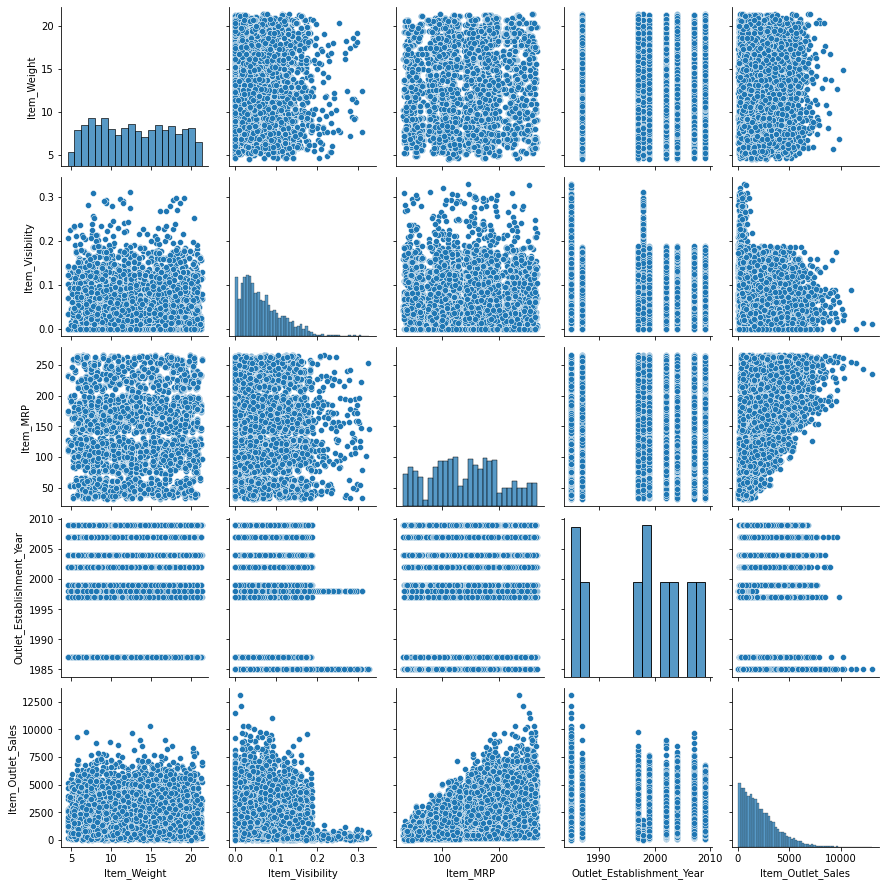

In [6]:
sns.pairplot(df1)

# Show the plot
plt.show()

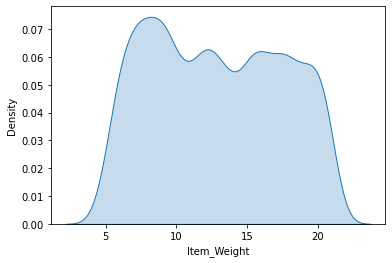

In [7]:
sns.kdeplot(df1['Item_Weight'], shade=True)

# Show the plot
plt.show()

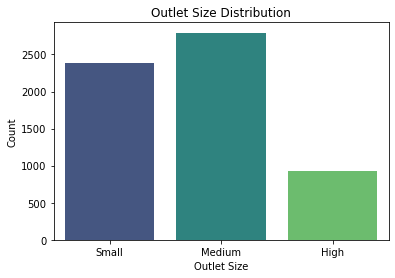

In [8]:
# Convert 'Outlet_Size' to categorical data type
df1['Outlet_Size'] = pd.Categorical(df1['Outlet_Size'], categories=['Small', 'Medium', 'High'], ordered=True)

# Create a bar chart for the 'Outlet_Size' categories
sns.countplot(x='Outlet_Size', data=df1, palette='viridis')

# Add labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution')

# Show the plot
plt.show()

### There is no significant differences between each category in Outlet_Size, So in such cases we wont perform mode imputation as it changes the distribution.

In [9]:
df1['Item_Weight'].skew()

0.0824262091221237

### We are not imputing with mean values in Item_Weight column as it changes the distribution of before imputation and after imputation values

In [10]:
'''from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Item_Weight' column
imputer.fit(df1[['Outlet_Size']])

# Transform the 'Item_Weight' column by filling missing values with the mean
df1['Outlet_Size'] = imputer.transform(df1[['Outlet_Size']])'''

"from sklearn.impute import SimpleImputer\n\n# Create a SimpleImputer object with strategy='mean'\nimputer = SimpleImputer(strategy='median')\n\n# Fit the imputer on the 'Item_Weight' column\nimputer.fit(df1[['Outlet_Size']])\n\n# Transform the 'Item_Weight' column by filling missing values with the mean\ndf1['Outlet_Size'] = imputer.transform(df1[['Outlet_Size']])"

### Random sample imputation has slighlty worked

In [11]:
missing_values = df1['Item_Weight'].isnull()

# Calculate the mean and standard deviation of non-missing values
mean_weight = df1.loc[~missing_values, 'Item_Weight'].mean()
std_weight = df1.loc[~missing_values, 'Item_Weight'].std()

# Generate random samples from a normal distribution with mean and std
random_samples = np.random.normal(mean_weight, std_weight, size=sum(missing_values))

# Replace missing values with the generated random samples
df1.loc[missing_values, 'Item_Weight'] = random_samples

# Verify the changes
print(df1['Item_Weight'])

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64


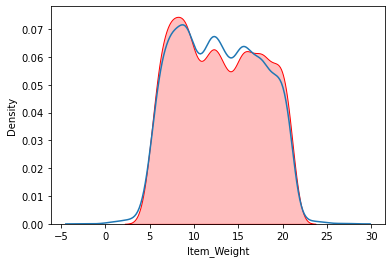

In [12]:
sns.kdeplot(df['Item_Weight'],color = 'red', shade=True)
sns.kdeplot(df1['Item_Weight'], shade=False)
# Show the plot
plt.show()

In [13]:
Item_Type = df1['Item_Type'].unique()
Item_Type

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [14]:
Outlet_Size_Content = df1['Outlet_Size'].unique()
Outlet_Size_Content

['Medium', NaN, 'High', 'Small']
Categories (3, object): ['Small' < 'Medium' < 'High']

In [15]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [16]:
Item_Fat_Content = df1['Item_Fat_Content'].unique()
Item_Fat_Content

array(['Low Fat', 'Regular'], dtype=object)

In [17]:
Outlet_Identifier = df1['Outlet_Identifier'].unique()
Outlet_Identifier

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [18]:
Outlet_Location_Type = df1['Outlet_Location_Type'].unique()
Outlet_Location_Type

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [19]:
Outlet_Type = df1['Outlet_Type'].unique()
Outlet_Type

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [20]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
mode_value = df1['Outlet_Size'].mode()[0]
df1['Outlet_Size'].fillna(mode_value, inplace=True)

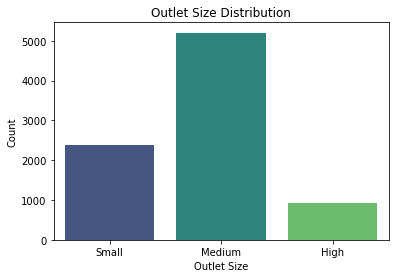

In [22]:
# Convert 'Outlet_Size' to categorical data type
df1['Outlet_Size'] = pd.Categorical(df1['Outlet_Size'], categories=['Small', 'Medium', 'High'], ordered=True)

# Create a bar chart for the 'Outlet_Size' categories
sns.countplot(x='Outlet_Size', data=df1, palette='viridis')

# Add labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution')

# Show the plot
plt.show()

In [23]:
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Extract the 'GENDER' column
all_column = df1[['Item_Type','Outlet_Location_Type', 'Outlet_Type']]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' to avoid multi-collinearity

# Fit and transform the 'GENDER' column
col_encoded = encoder.fit_transform(all_column)

# Create a DataFrame with the one-hot encoded columns
col_encoded_df = pd.DataFrame(col_encoded, columns=encoder.get_feature_names_out(['Item_Type','Outlet_Location_Type', 'Outlet_Type']))

# Replace the original 'GENDER' column with the one-hot encoded columns in df1
df1 = pd.concat([df1.drop(['Item_Type','Outlet_Location_Type', 'Outlet_Type'], axis=1), col_encoded_df], axis=1)

# Display the resulting DataFrame
df1.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP  \
0           FDA15         9.30          Low Fat         0.016047  249.8092   
1           DRC01         5.92          Regular         0.019278   48.2692   
2           FDN15        17.50          Low Fat         0.016760  141.6180   
3           FDX07        19.20          Regular         0.000000  182.0950   
4           NCD19         8.93          Low Fat         0.000000   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  Item_Outlet_Sales  \
0            OUT049                       1999      Medium          3735.1380   
1            OUT018                       2009      Medium           443.4228   
2            OUT049                       1999      Medium          2097.2700   
3            OUT010                       1998      Medium           732.3800   
4            OUT013                       1987        High           994.7052   

   Item_Type_Breads  ...  Item_Type_Others  Item_Type_Seafood  \
0               0.0  ...               0.0                0.0   
1               0.0  ...               0.0                0.0   
2               0.0  ...               0.0                0.0   
3               0.0  ...               0.0                0.0   
4               0.0  ...               0.0                0.0   

   Item_Type_Snack Foods  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
0                    0.0                    0.0                      0.0   
1                    0.0                    1.0                      0.0   
2                    0.0                    0.0                      0.0   
3                    0.0                    0.0                      0.0   
4                    0.0                    0.0                      0.0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                          0.0                          0.0   
1                          0.0                          1.0   
2                          0.0                          0.0   
3                          0.0                          1.0   
4                          0.0                          1.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            1.0                            0.0   
1                            0.0                            1.0   
2                            1.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   

   Outlet_Type_Supermarket Type3  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  

[5 rows x 29 columns]

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Create a mapping of ordinal values for the 'Item_Fat_Content' column
mem_order = ['Low Fat', 'Regular']

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[mem_order])

# Fit and transform the 'Education' column
df1['Item_Fat_Content_encoded'] = encoder.fit_transform(df1[['Item_Fat_Content']])

# Drop the original 'Education' column if needed
df1 = df1.drop('Item_Fat_Content', axis=1)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Item_Identifier                  8523 non-null   object  
 1   Item_Weight                      8523 non-null   float64 
 2   Item_Visibility                  8523 non-null   float64 
 3   Item_MRP                         8523 non-null   float64 
 4   Outlet_Identifier                8523 non-null   object  
 5   Outlet_Establishment_Year        8523 non-null   int64   
 6   Outlet_Size                      8523 non-null   category
 7   Item_Outlet_Sales                8523 non-null   float64 
 8   Item_Type_Breads                 8523 non-null   float64 
 9   Item_Type_Breakfast              8523 non-null   float64 
 10  Item_Type_Canned                 8523 non-null   float64 
 11  Item_Type_Dairy                  8523 non-null   float64 
 12  Item_T

In [27]:
from sklearn.preprocessing import OrdinalEncoder

# Create a mapping of ordinal values for the 'Outlet_Size' column
mem_order = ['Small', 'Medium', 'High']

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[mem_order])

# Fit and transform the 'Education' column
df1['Outlet_Size_encoded'] = encoder.fit_transform(df1[['Outlet_Size']])

# Drop the original 'Education' column if needed
df1 = df1.drop('Outlet_Size', axis=1)

In [28]:
df1.head()

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP Outlet_Identifier  \
0           FDA15         9.30         0.016047  249.8092            OUT049   
1           DRC01         5.92         0.019278   48.2692            OUT018   
2           FDN15        17.50         0.016760  141.6180            OUT049   
3           FDX07        19.20         0.000000  182.0950            OUT010   
4           NCD19         8.93         0.000000   53.8614            OUT013   

   Outlet_Establishment_Year  Item_Outlet_Sales  Item_Type_Breads  \
0                       1999          3735.1380               0.0   
1                       2009           443.4228               0.0   
2                       1999          2097.2700               0.0   
3                       1998           732.3800               0.0   
4                       1987           994.7052               0.0   

   Item_Type_Breakfast  Item_Type_Canned  ...  Item_Type_Snack Foods  \
0                  0.0               0.0  ...                    0.0   
1                  0.0               0.0  ...                    0.0   
2                  0.0               0.0  ...                    0.0   
3                  0.0               0.0  ...                    0.0   
4                  0.0               0.0  ...                    0.0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
0                    0.0                      0.0   
1                    1.0                      0.0   
2                    0.0                      0.0   
3                    0.0                      0.0   
4                    0.0                      0.0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                          0.0                          0.0   
1                          0.0                          1.0   
2                          0.0                          0.0   
3                          0.0                          1.0   
4                          0.0                          1.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            1.0                            0.0   
1                            0.0                            1.0   
2                            1.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   

   Outlet_Type_Supermarket Type3  Item_Fat_Content_encoded  \
0                            0.0                       0.0   
1                            0.0                       1.0   
2                            0.0                       0.0   
3                            0.0                       1.0   
4                            0.0                       0.0   

   Outlet_Size_encoded  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  2.0  

[5 rows x 29 columns]

In [29]:
df1 = df1.drop(['Item_Identifier','Outlet_Identifier'],axis = 1)
df1

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Outlet_Sales  Item_Type_Breads  Item_Type_Breakfast  \
0             3735.1380               0.0                  0.0   
1              443.4228               0.0                  0.0   
2             2097.2700               0.0                  0.0   
3              732.3800               0.0                  0.0   
4              994.7052               0.0                  0.0   
...                 ...               ...                  ...   
8518          2778.3834               0.0                  0.0   
8519           549.2850               0.0                  0.0   
8520          1193.1136               0.0                  0.0   
8521          1845.5976               0.0                  0.0   
8522           765.6700               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
0                  0.0              1.0                     0.0  ...   
1                  0.0              0.0                     0.0  ...   
2                  0.0              0.0                     0.0  ...   
3                  0.0              0.0                     0.0  ...   
4                  0.0              0.0                     0.0  ...   
...                ...              ...                     ...  ...   
8518               0.0              0.0                     0.0  ...   
8519               0.0              0.0                     0.0  ...   
8520               0.0              0.0                     0.0  ...   
8521               0.0              0.0                     0.0  ...   
8522               0.0              0.0                     0.0  ...   

      Item_Type_Snack Foods  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
0                       0.0                    0.0                      0.0   
1                       0.0                    1.0                      0.0   
2                       0.0                    0.0                      0.0   
3                       0.0                    0.0                      0.0   
4                       0.0                    0.0                      0.0   
...                     ...                    ...                      ...   
8518                    1.0                    0.0                      0.0   
8519                    0.0                    0.0                      0.0   
8520                    0.0                    0.0                      0.0   
8521                    1.0                    0.0                      0.0   
8522                    0.0                    1.0                      0.0   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                             0.0                          0.0   
1                             0.0                          1.0   
2                             0.0                          0.0   
3                             0.0                          1.0   
4                             0.0                          1.0   
...                           ...                          ...   
8518                          0.0   

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Type_Breads                 8523 non-null   float64
 6   Item_Type_Breakfast              8523 non-null   float64
 7   Item_Type_Canned                 8523 non-null   float64
 8   Item_Type_Dairy                  8523 non-null   float64
 9   Item_Type_Frozen Foods           8523 non-null   float64
 10  Item_Type_Fruits and Vegetables  8523 non-null   float64
 11  Item_Type_Hard Drinks            8523 non-null   float64
 12  Item_Type_Health and

In [31]:
df1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Fat_Content_encoded', 'Outlet_Size_encoded'],
      dtype='object')

In [32]:
columns_to_convert = ['Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Fat_Content_encoded', 'Outlet_Size_encoded']


# Convert specified columns to int
df1[columns_to_convert] = df1[columns_to_convert].astype(int)

# Display the resulting DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Type_Breads                 8523 non-null   int32  
 6   Item_Type_Breakfast              8523 non-null   int32  
 7   Item_Type_Canned                 8523 non-null   int32  
 8   Item_Type_Dairy                  8523 non-null   int32  
 9   Item_Type_Frozen Foods           8523 non-null   int32  
 10  Item_Type_Fruits and Vegetables  8523 non-null   int32  
 11  Item_Type_Hard Drinks            8523 non-null   int32  
 12  Item_Type_Health and

In [33]:
df1

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Outlet_Sales  Item_Type_Breads  Item_Type_Breakfast  \
0             3735.1380                 0                    0   
1              443.4228                 0                    0   
2             2097.2700                 0                    0   
3              732.3800                 0                    0   
4              994.7052                 0                    0   
...                 ...               ...                  ...   
8518          2778.3834                 0                    0   
8519           549.2850                 0                    0   
8520          1193.1136                 0                    0   
8521          1845.5976                 0                    0   
8522           765.6700                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
0                    0                1                       0  ...   
1                    0                0                       0  ...   
2                    0                0                       0  ...   
3                    0                0                       0  ...   
4                    0                0                       0  ...   
...                ...              ...                     ...  ...   
8518                 0                0                       0  ...   
8519                 0                0                       0  ...   
8520                 0                0                       0  ...   
8521                 0                0                       0  ...   
8522                 0                0                       0  ...   

      Item_Type_Snack Foods  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
0                         0                      0                        0   
1                         0                      1                        0   
2                         0                      0                        0   
3                         0                      0                        0   
4                         0                      0                        0   
...                     ...                    ...                      ...   
8518                      1                      0                        0   
8519                      0                      0                        0   
8520                      0                      0                        0   
8521                      1                      0                        0   
8522                      0                      1                        0   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                               0                            0   
1                               0                            1   
2                               0                            0   
3                               0                            1   
4                               0                            1   
...                           ...                          ...   
8518                            0   

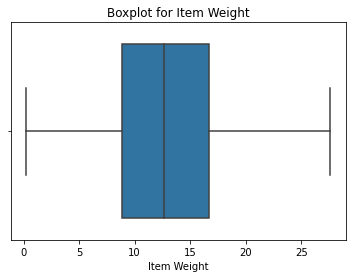

In [34]:
# Replace negative 'Item_Weight' values with their absolute values
df1['Item_Weight'] = df1['Item_Weight'].abs()

# Create a boxplot for the 'Item_Weight' column
sns.boxplot(x=df1['Item_Weight'])

# Add labels and title
plt.xlabel('Item Weight')
plt.title('Boxplot for Item Weight')

# Show the plot
plt.show()

In [35]:
df1['Item_Weight'].skew() #normally distributed

0.06976917888095042

In [36]:
df1['Item_Visibility'].skew() # Highly right skewed

1.1670905496918396

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

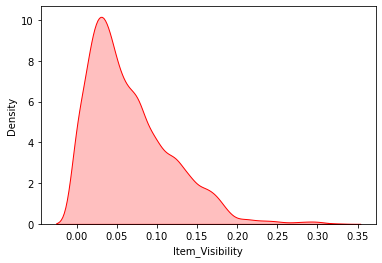

In [37]:
sns.kdeplot(df1['Item_Visibility'],color = 'red', shade=True)

In [38]:
'''# Perform log transform on the 'Annual_income' column
df1['Item_Visibility_log'] = np.log(df1['Item_Visibility'])

fig = px.box(df1[['Item_Visibility_log']])
fig.show()'''

"# Perform log transform on the 'Annual_income' column\ndf1['Item_Visibility_log'] = np.log(df1['Item_Visibility'])\n\nfig = px.box(df1[['Item_Visibility_log']])\nfig.show()"

In [39]:
'''IVL = df1["Item_Visibility_log"].value_counts()
IVL'''

'IVL = df1["Item_Visibility_log"].value_counts()\nIVL'

In [40]:
df1['Item_MRP'].skew() # normally skewed

0.1272022683110526

In [41]:
from sklearn.preprocessing import MinMaxScaler
# Extract 'Item_MRP' column
item_mrp = df1[['Item_MRP']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Item_MRP' column
item_mrp_scaled = scaler.fit_transform(item_mrp)

# Replace the original 'Item_MRP' column with the scaled values
df1['Item_MRP'] = item_mrp_scaled

# Display the DataFrame after scaling
df1.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  0.927507                       1999   
1         5.92         0.019278  0.072068                       2009   
2        17.50         0.016760  0.468288                       1999   
3        19.20         0.000000  0.640093                       1998   
4         8.93         0.000000  0.095805                       1987   

   Item_Outlet_Sales  Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  \
0          3735.1380                 0                    0                 0   
1           443.4228                 0                    0                 0   
2          2097.2700                 0                    0                 0   
3           732.3800                 0                    0                 0   
4           994.7052                 0                    0                 0   

   Item_Type_Dairy  Item_Type_Frozen Foods  ...  Item_Type_Snack Foods  \
0                1                       0  ...                      0   
1                0                       0  ...                      0   
2                0                       0  ...                      0   
3                0                       0  ...                      0   
4                0                       0  ...                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
0                      0                        0   
1                      1                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            0                            1   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  Item_Fat_Content_encoded  \
0                              0                         0   
1                              0                         1   
2                              0                         0   
3                              0                         1   
4                              0                         0   

   Outlet_Size_encoded  
0                    1  
1                    1  
2                    1  
3                    1  
4                    2  

[5 rows x 27 columns]

In [42]:
from sklearn.preprocessing import MinMaxScaler
# Extract 'Item_MRP' column
item_mrp = df1[['Item_Weight']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Item_MRP' column
item_mrp_scaled = scaler.fit_transform(item_mrp)

# Replace the original 'Item_MRP' column with the scaled values
df1['Item_Weight'] = item_mrp_scaled

# Display the DataFrame after scaling
df1.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     0.331860         0.016047  0.927507                       1999   
1     0.208443         0.019278  0.072068                       2009   
2     0.631274         0.016760  0.468288                       1999   
3     0.693348         0.000000  0.640093                       1998   
4     0.318350         0.000000  0.095805                       1987   

   Item_Outlet_Sales  Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  \
0          3735.1380                 0                    0                 0   
1           443.4228                 0                    0                 0   
2          2097.2700                 0                    0                 0   
3           732.3800                 0                    0                 0   
4           994.7052                 0                    0                 0   

   Item_Type_Dairy  Item_Type_Frozen Foods  ...  Item_Type_Snack Foods  \
0                1                       0  ...                      0   
1                0                       0  ...                      0   
2                0                       0  ...                      0   
3                0                       0  ...                      0   
4                0                       0  ...                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
0                      0                        0   
1                      1                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            0                            1   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  Item_Fat_Content_encoded  \
0                              0                         0   
1                              0                         1   
2                              0                         0   
3                              0                         1   
4                              0                         0   

   Outlet_Size_encoded  
0                    1  
1                    1  
2                    1  
3                    1  
4                    2  

[5 rows x 27 columns]

In [43]:
df1['Item_Outlet_Sales'].skew() # Highly right skewed

1.1775306028542796

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

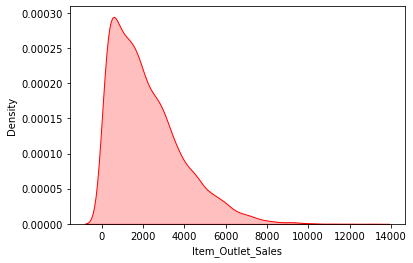

In [44]:
sns.kdeplot(df1['Item_Outlet_Sales'],color = 'red', shade=True)

In [45]:
fig = px.box(df1[['Item_Outlet_Sales']])
fig.show()

In [46]:
upper_fence_value = 13086.96  # Assuming the value is in the same units as your 'Item_Outlet_Sales'

# Create a boxplot using Plotly
fig = px.box(df1, y='Item_Outlet_Sales', title='Boxplot for Item Outlet Sales (With Upper Limit)')

# Set the upper limit of the y-axis
fig.update_layout(yaxis=dict(range=[0, upper_fence_value]))

# Show the plot
fig.show()

In [47]:
# Perform log transform on the 'Annual_income' column
df1['Item_Outlet_Sales_log'] = np.log(df1['Item_Outlet_Sales'])


fig = px.box(df1[['Item_Outlet_Sales_log']])
fig.show()
df1['Item_Outlet_Sales_log'].skew()

-0.887753343209305

In [48]:
df1 = df1.drop(['Item_Visibility','Item_Outlet_Sales'],axis = 1)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_MRP                         8523 non-null   float64
 2   Outlet_Establishment_Year        8523 non-null   int64  
 3   Item_Type_Breads                 8523 non-null   int32  
 4   Item_Type_Breakfast              8523 non-null   int32  
 5   Item_Type_Canned                 8523 non-null   int32  
 6   Item_Type_Dairy                  8523 non-null   int32  
 7   Item_Type_Frozen Foods           8523 non-null   int32  
 8   Item_Type_Fruits and Vegetables  8523 non-null   int32  
 9   Item_Type_Hard Drinks            8523 non-null   int32  
 10  Item_Type_Health and Hygiene     8523 non-null   int32  
 11  Item_Type_Household              8523 non-null   int32  
 12  Item_Type_Meat      

In [50]:
from sklearn.feature_selection import VarianceThreshold

In [51]:
X=df1.drop(labels=['Item_Outlet_Sales_log'], axis=1)
y=df1['Item_Outlet_Sales_log']

In [52]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [53]:
X_train.shape, X_test.shape

((5966, 25), (2557, 25))

In [54]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['Item_MRP'] = scaler.fit_transform(X_train[['Item_MRP']])

# Apply the same transformation to the 'Item_MRP' column in the test set
X_test['Item_MRP'] = scaler.transform(X_test[['Item_MRP']])'''

"from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_train['Item_MRP'] = scaler.fit_transform(X_train[['Item_MRP']])\n\n# Apply the same transformation to the 'Item_MRP' column in the test set\nX_test['Item_MRP'] = scaler.transform(X_test[['Item_MRP']])"

In [55]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [56]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


### This shows that there is no constant features

In [57]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([2.64310478e-02, 7.88240814e-01, 1.36085234e-01, 5.52018096e-03,
       0.00000000e+00, 7.66118199e-03, 9.79894116e-03, 2.95905479e-04,
       5.10861714e-03, 7.30699904e-03, 2.10489172e-03, 8.78341513e-03,
       0.00000000e+00, 1.15955270e-03, 2.55485866e-03, 9.59998884e-03,
       6.89760505e-03, 0.00000000e+00, 4.08885644e-02, 1.32698529e-02,
       8.77982174e-02, 0.00000000e+00, 4.54289591e-02, 8.79084454e-03,
       5.58392431e-03])

In [58]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Item_MRP                           0.788241
Outlet_Establishment_Year          0.136085
Outlet_Type_Supermarket Type1      0.087798
Outlet_Type_Supermarket Type3      0.045429
Outlet_Location_Type_Tier 2        0.040889
Item_Weight                        0.026431
Outlet_Location_Type_Tier 3        0.013270
Item_Type_Dairy                    0.009799
Item_Type_Snack Foods              0.009600
Item_Fat_Content_encoded           0.008791
Item_Type_Household                0.008783
Item_Type_Canned                   0.007661
Item_Type_Hard Drinks              0.007307
Item_Type_Soft Drinks              0.006898
Outlet_Size_encoded                0.005584
Item_Type_Breads                   0.005520
Item_Type_Fruits and Vegetables    0.005109
Item_Type_Seafood                  0.002555
Item_Type_Health and Hygiene       0.002105
Item_Type_Others                   0.001160
Item_Type_Frozen Foods             0.000296
Item_Type_Starchy Foods            0.000000
Outlet_Type_Supermarket Type2   

<AxesSubplot:>

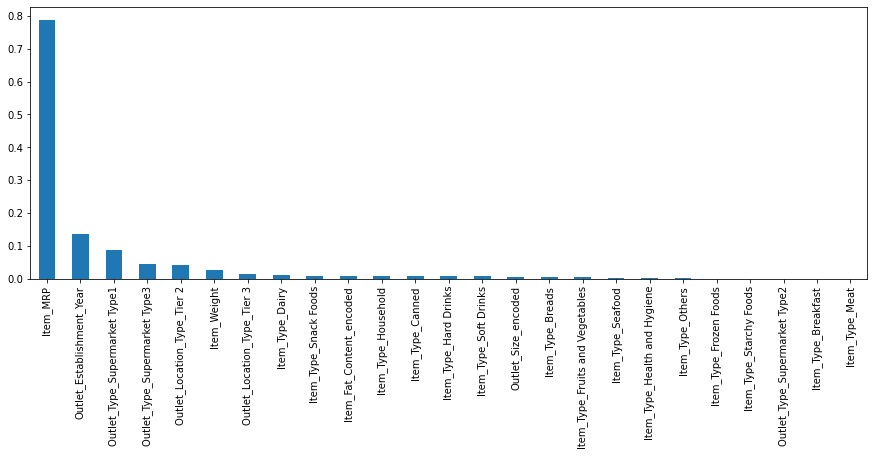

In [59]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [60]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x000001CFEF009C10>)

In [61]:
X_train.columns[selected_top_columns.get_support()]

Index(['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Type_Dairy', 'Item_Type_Hard Drinks', 'Item_Type_Household',
       'Item_Type_Snack Foods', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type3', 'Item_Fat_Content_encoded'],
      dtype='object')

# Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


X = df1[['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Type_Canned', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Household', 'Item_Type_Snack Foods',
       'Outlet_Location_Type_Tier 2', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type3', 'Item_Fat_Content_encoded']]

y = df1['Item_Outlet_Sales_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Squared Error (MSE): 0.36
Root Mean Squared Error (RMSE): 0.60
Mean Absolute Error (MAE): 0.46
R-squared (R2) Score: 0.6628


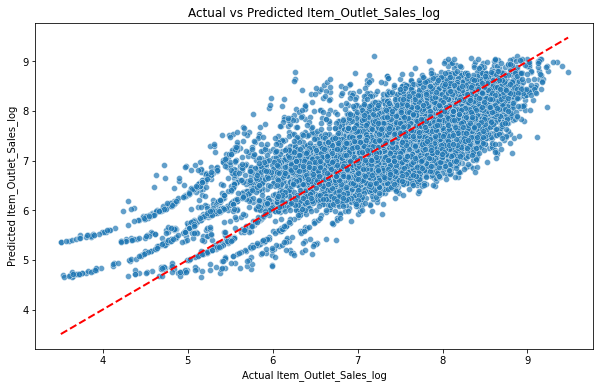

In [63]:
from sklearn.linear_model import LinearRegression


# Features and target variable
X_train = df1[['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year',
               'Item_Type_Canned', 'Item_Type_Fruits and Vegetables',
               'Item_Type_Hard Drinks', 'Item_Type_Household', 'Item_Type_Snack Foods',
               'Outlet_Location_Type_Tier 2', 'Outlet_Type_Supermarket Type1',
               'Outlet_Type_Supermarket Type3', 'Item_Fat_Content_encoded']]

y_train = df1['Item_Outlet_Sales_log']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the training data
y_pred = model.predict(X_train)

# Plotting the best fit line
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_train, y=y_pred, alpha=0.7)

# Plotting the best fit line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Actual Item_Outlet_Sales_log')
plt.ylabel('Predicted Item_Outlet_Sales_log')
plt.title('Actual vs Predicted Item_Outlet_Sales_log')

# Show the plot
plt.show()


# Support Vector Regressor

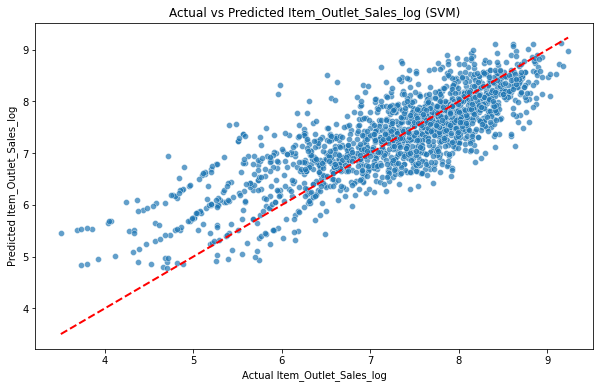

In [64]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
svm_model = SVR(kernel='linear')  # You can try different kernels like 'rbf', 'poly', etc.

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Plotting the best fit line
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Plotting the best fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Actual Item_Outlet_Sales_log')
plt.ylabel('Predicted Item_Outlet_Sales_log')
plt.title('Actual vs Predicted Item_Outlet_Sales_log (SVM)')

# Show the plot
plt.show()


In [65]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2:.4f}')

R-squared (R2) Score: 0.6579


# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Features and target variable
X = df1[['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year',
         'Item_Type_Canned', 'Item_Type_Fruits and Vegetables',
         'Item_Type_Hard Drinks', 'Item_Type_Household', 'Item_Type_Snack Foods',
         'Outlet_Location_Type_Tier 2', 'Outlet_Type_Supermarket Type1',
         'Outlet_Type_Supermarket Type3', 'Item_Fat_Content_encoded']]

y = df1['Item_Outlet_Sales_log']

# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_model.fit(X, y)

# Predictions on the test set
y_pred = tree_model.predict(X)

# Calculate R-squared (R2) score
r2 = r2_score(y, y_pred)
print(f'R-squared (R2) Score: {r2:.4f}')


R-squared (R2) Score: 1.0000


In [67]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# XGBoost

In [68]:
from xgboost import XGBRegressor

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2:.4f}')


R-squared (R2) Score: 0.8637
